In [2]:
import tensorflow as tf

Using TensorFlow backend.


In [3]:
print(tf.__version__)

2.16.1


In [7]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.10.0.82-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.82-cp37-abi3-win_amd64.whl (38.8 MB)


In [4]:
import cv2
print(cv2.__version__)

4.10.0


In [5]:
import matplotlib.pyplot as plt

In [6]:
config_file="ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="frozen_inference_graph.pb"

In [7]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [8]:
classLabels=[]#empty list of python
file_name="label.txt"
with open(file_name,"rt") as fpt:
    classLabels= fpt.read().rstrip('\n').split('\n')
    #classLables.append(fpt.read())

In [9]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'dog', 'cat', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [10]:
print(len(classLabels))

80


In [11]:
## SETUP the configuration
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)#255/2=127.5
model.setInputMean((127.5,127.5,127.5))#mobilenet=>[-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 0000023894E1E4D0>

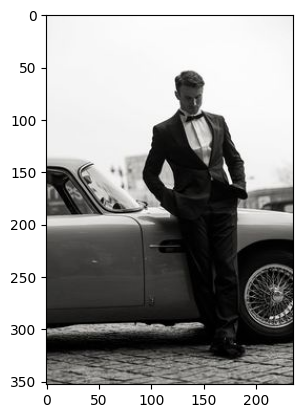

In [12]:
img= cv2.imread("image4.jpg")
##to get the actual image
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


In [13]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)

In [14]:
print(ClassIndex)

[1 3]


In [15]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale, color=(0,255,0),thickness=3)

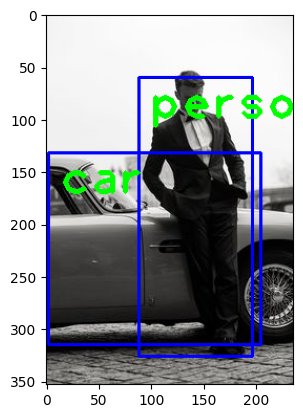

In [16]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

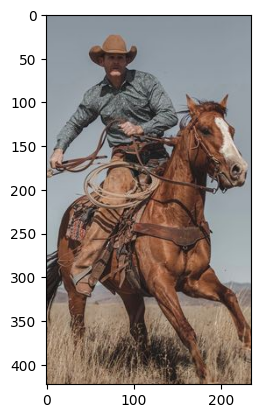

In [17]:
img1= cv2.imread("image3.jpg")
##to get the actual image
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

In [18]:
ClassIndex,confidece,bbox=model.detect(img1,confThreshold=0.5)

In [19]:
print(ClassIndex)

[19  1  1]


In [21]:
font_scale=2
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex,confidece,bbox):
    cv2.rectangle(img1,boxes,(255,0,0),2)
    cv2.putText(img1,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale, color=(0,255,0),thickness=3)

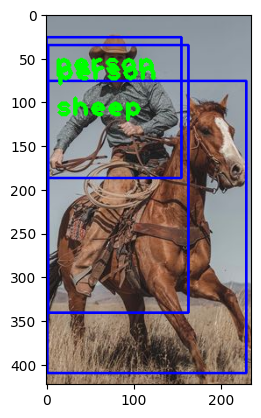

In [22]:
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

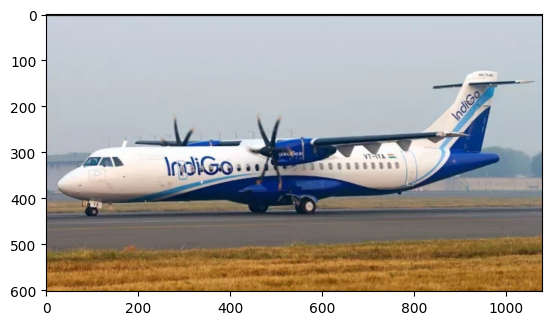

In [26]:
img2= cv2.imread("4.jpg")
##to get the actual image
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

In [27]:
ClassIndex,confidece,bbox=model.detect(img2,confThreshold=0.5)

In [28]:
print(ClassIndex)

[5]


In [29]:
font_scale=2
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex,confidece,bbox):
    cv2.rectangle(img2,boxes,(255,0,0),2)
    cv2.putText(img2,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale, color=(0,255,0),thickness=3)

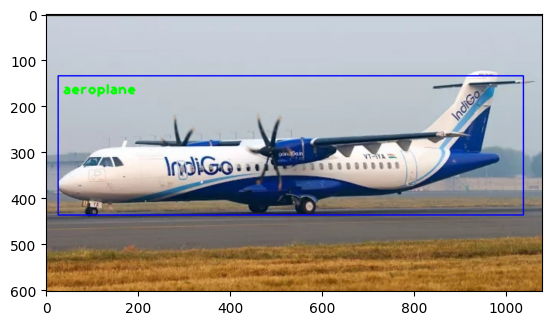

In [30]:
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))